In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import Point
from itertools import combinations

In [ ]:
eu = gpd.read_file("data/europe/NUTS_RG_10M_2024_3035.shp")

In [1]:
cities = {
    "London": (-0.0695, 51.5185),
    "Berlin": (13.4205, 52.5495),
    "Madrid": (-3.6215, 40.4405),
    "Zurich": (8.5605, 47.4185),
    "Vienna": (16.4075, 48.2715),
    "Lisbon": (-9.1215, 38.7915),
    "Warsaw": (20.9375, 52.2515),
    "Paris": (2.4075, 48.7905),
    "Istanbul": (28.8305, 40.9915),
    "Athens": (23.7705, 38.0695)
}

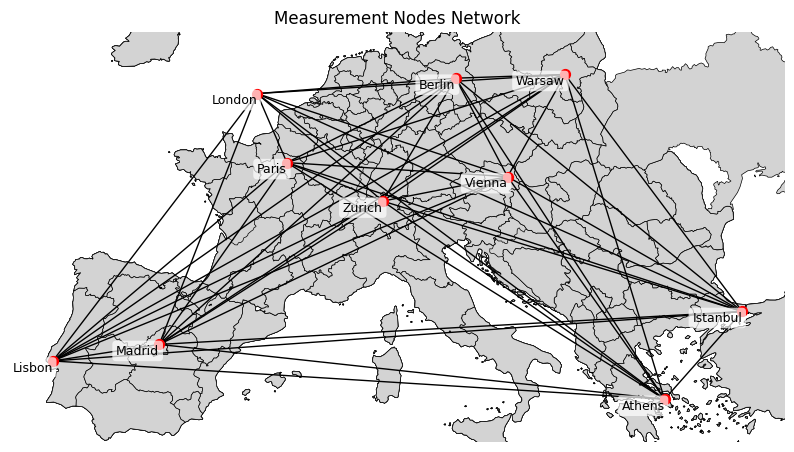

In [67]:
city_gdf = gpd.GeoDataFrame(
    {"city": list(cities.keys())},
    geometry=[Point(lon, lat) for lon, lat in cities.values()],
    crs="EPSG:4326"
)

city_gdf = city_gdf.to_crs(epsg=3035)

G = nx.Graph()
for idx, row in city_gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    G.add_node(row.city, pos=(x, y))

city_names = list(cities.keys())
for u, v in combinations(city_names, 2):
    G.add_edge(u, v)

pos = nx.get_node_attributes(G, "pos")

bounds = city_gdf.total_bounds

margin = 200000 
xlim = ([bounds[0] - margin, bounds[2] + margin])
ylim = ([bounds[1] - margin, bounds[3] + margin])

fig, ax = plt.subplots(figsize=(10, 10))
eu.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.5)
nx.draw(G, pos, ax=ax, with_labels=False, node_size=50, node_color='red', font_size=10)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

bbox_settings = {
    "boxstyle": "round,pad=0.3",
    "fc": "white",
    "alpha": 0.7,
    "ec": "none"
}

nx.draw_networkx_labels(
    G, 
    pos, 
    ax=ax, 
    font_size=9, 
    horizontalalignment='right',
    verticalalignment='top',
    bbox=bbox_settings
)

ax.set_title("Measurement Nodes Network")
plt.show()